![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/legal-nlp/08.0.Answering_Questions_Legal_Texts.ipynb)

#🔎 Answering Questions on Legal Texts
One of the latests biggest outcomes in NLP are **Language Models** and their ability to answer questions, expressed in natural language.

> *In February 2017, the Company entered into an asset purchase agreement with NetSeer, Inc.
...
 The Company hereby grants to Seller a perpetual, non-exclusive, royalty-free license.
...
On March 12, 2020, we closed a Loan and Security Agreement with Hitachi Capital American Corp (also known as "Hitachi")
...*




```
- What is the type of agreement?
- What is the type of license?
- What are the companies in the agreement?
- What is also known as the different compaines?
- Who is the recipient of a license?
````

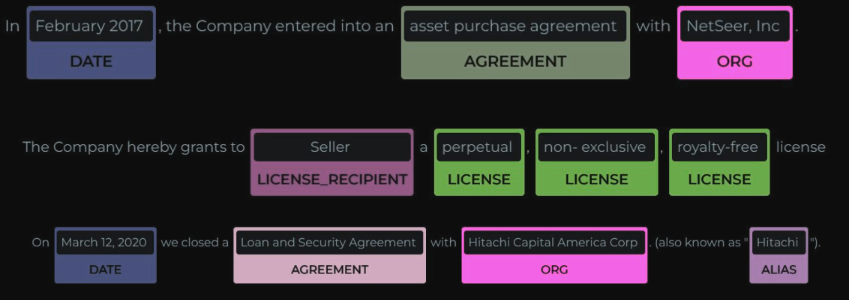



**Question Answeering (QA)** uses specific Language Models trained to carry out **Natural Language Inference (NLI)**

**NLI** works as follows:
- Given a text as a Premise (P);
- Given a hypotheses (H) as a question to be solved;
   - Then, we ask the Language Model is H is `entailed`, `contradicted` or `not related` in P. 


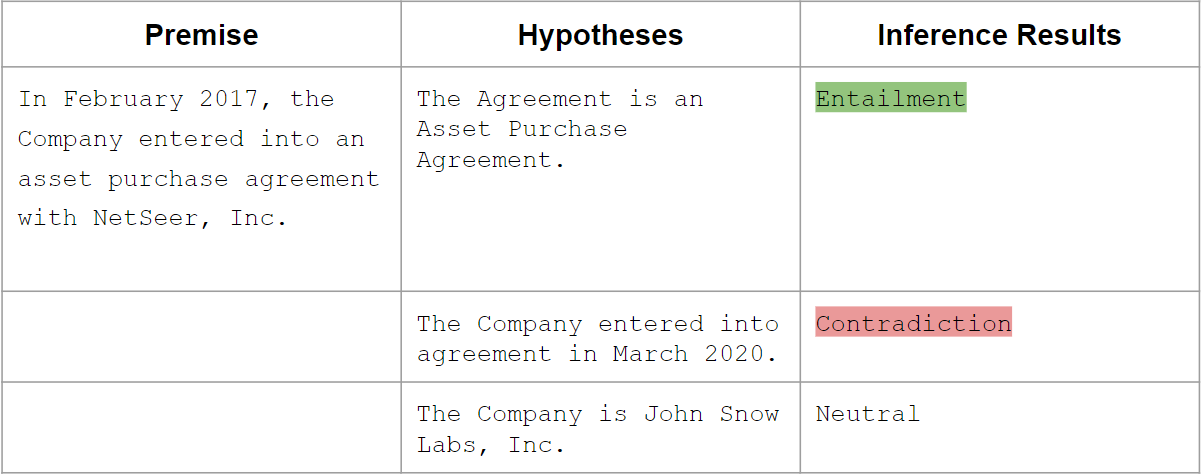

Although we are not getting into the maths of it, it's basically done by using a Language Model to encode P, H and then carry out sentence similarity operations.

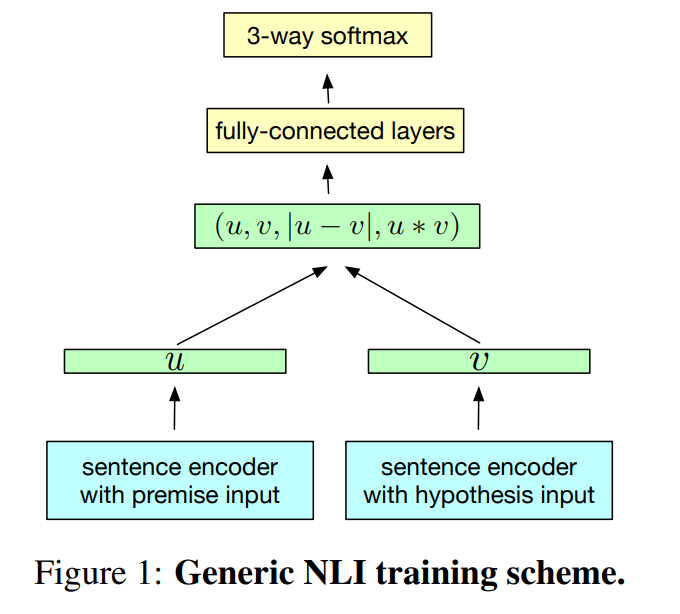

##📜 Applications of NLI: The basics
The most straight-forward, retrieving answers to natural language questions.
  - Type 1: Open-book questions, where you give the text (P) to the model.
  - Type 2: Close-book questions, where you just use the pretrained Language Model capabilities, learn on texts during training time.

##📜 Applications of NLI: Zero-shot
At John Snow Labs, we have developed our own annotators based on NLI, to not only carry out Question Answering, but using QA to:
- Retrieve Entities, also know as Zero-shot NER;
- Retrieve Relations, also known as Zero-shot Relation Extraction;

###✔️ How we achieve Zero-shot NER With QA?
Given a Question Q, for example, `What is the type of the agreement?`, and given the text P `In February 2017, the Company entered into an Asset Purchase Agreement with NetSeer, Inc.` we:

- Generate Hypotheses H with the tokens of the text
  - The type of agreement is February: `contradiction`
  - The type of agreement is 2017: `contradiction`
  - The type of agreement is ...: `contradiction`
  - The type of agreement is Asset: `entailment`
  - The type of agreement is Purchase: `entailment`

- We check all the H towards P to see if they are `entailed`. If so, we return them as NER entity. If several tokens in a row return `entailed`, we check if they can be part of the same chunk.

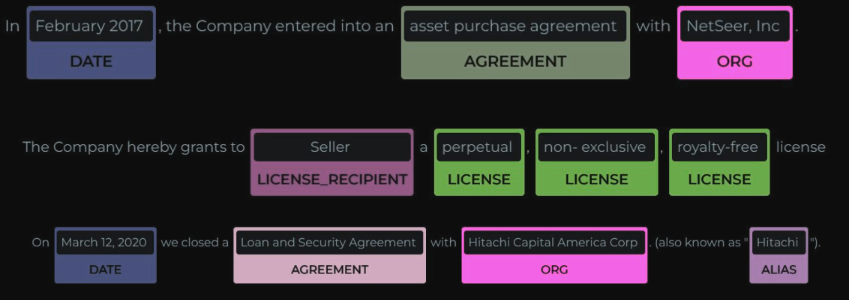

Let's take a look at some examples of applications of QA to Legal Texts.

#🎬 Installation

In [1]:
! pip install -q johnsnowlabs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.7/486.7 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 639.9/639.9 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.1 MB/s eta 0:00:00


##🔗 Automatic Installation
Using my.johnsnowlabs.com SSO

In [2]:
from johnsnowlabs import nlp, legal

# nlp.install(force_browser=True)

##🔗 Manual downloading
If you are not registered in my.johnsnowlabs.com, you received a license via e-email or you are using Safari, you may need to do a manual update of the license.

- Go to my.johnsnowlabs.com
- Download your license
- Upload it using the following command

In [ ]:
from google.colab import files
print('Please Upload your John Snow Labs License using the button below')
license_keys = files.upload()

- Install it

In [4]:
nlp.install()

👌 Detected license file /content/spark_nlp_for_healthcare_spark_ocr_7162 (6).json
🚨 Outdated OCR Secrets in license file. Version=4.4.2 but should be Version=4.4.1
📋 Stored John Snow Labs License in /root/.johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare_Spark-OCR.json
👷 Setting up  John Snow Labs home in /root/.johnsnowlabs, this might take a few minutes.
🙆 JSL Home setup in /root/.johnsnowlabs
👌 Detected license file /content/spark_nlp_for_healthcare_spark_ocr_7162 (6).json
Installing /root/.johnsnowlabs/py_installs/spark_nlp_jsl-4.4.2-py3-none-any.whl to /usr/bin/python3
Installed 1 products:
💊 Spark-Healthcare==4.4.2 installed! ✅ Heal the planet with NLP! 


#📌 Starting

In [5]:
spark = nlp.start()

👌 Detected license file /content/spark_nlp_for_healthcare_spark_ocr_7162 (6).json
👌 Launched cpu optimized session with with: 🚀Spark-NLP==4.4.1, 💊Spark-Healthcare==4.4.2, running on ⚡ PySpark==3.1.2


#✔️ Open Book Questions

In [ ]:
! wget https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/legal-nlp/data/credit_agreement.txt

--2023-06-03 17:50:32--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/legal-nlp/data/credit_agreement.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 405174 (396K) [text/plain]
Saving to: ‘credit_agreement.txt’

credit_agreement.tx 100%[===================>] 395.68K  --.-KB/s    in 0.04s   

2023-06-03 17:50:32 (8.91 MB/s) - ‘credit_agreement.txt’ saved [405174/405174]



In [ ]:
with open('credit_agreement.txt', 'r') as f:
  credit_agreement = f.read()

In [ ]:
print(credit_agreement[:1000])



                                                                    Exhibit 10.1

                                                                  EXECUTION COPY

                    $225,000,000.00 REVOLVING CREDIT FACILITY

                                CREDIT AGREEMENT

                                  by and among

                             P.H. GLATFELTER COMPANY

                                       and

                    Certain of its Subsidiaries, as Borrowers

                                       and

                       THE BANKS PARTY HERETO, as Lenders

                                       and

             PNC BANK, NATIONAL ASSOCIATION, as Administrative Agent

                                      with

           PNC CAPITAL MARKETS LLC and CITIZENS BANK OF PENNSYLVANIA,

                  as Joint Lead Arrangers and Joint Bookrunners

                                       and

               CITIZENS BANK OF PENNSYLVANIA, as Syndication Agent

   

Let's read and normalize a little the spacing of the NLP models may think those are different sentences and get unexpected results.

In [ ]:
import re
normalized_intro = re.sub(r'\s+', ' ', credit_agreement[:1000])
normalized_intro

' Exhibit 10.1 EXECUTION COPY $225,000,000.00 REVOLVING CREDIT FACILITY CREDIT AGREEMENT by and among P.H. GLATFELTER COMPANY and Certain of its Subsidiaries, as Borrowers and THE BANKS PARTY HERETO, as Lenders and PNC BANK, NATIONAL ASSOCIATION, as Administrative Agent with PNC CAPITAL MARKETS LLC and CITIZENS BANK OF PENNSYLVANIA, as Joint Lead Arrangers and Joint Bookrunners and CITIZENS BANK OF PENNSYLVANIA, as Syndication Agent '

In [ ]:
normalized_intro = "Exhibit 10.1 EXECUTION COPY $225,000,000.00 REVOLVING CREDIT FACILITY CREDIT AGREEMENT by and among P.H. GLATFELTER COMPANY and Certain of its Subsidiaries, as Borrowers and THE BANKS PARTY HERETO, as Lenders and PNC BANK, NATIONAL ASSOCIATION, as Administrative Agent with PNC CAPITAL MARKETS LLC and CITIZENS BANK OF PENNSYLVANIA, as Joint Lead Arrangers and Joint Bookrunners and CITIZENS BANK OF PENNSYLVANIA, as Syndication Agent."

##🚀 Let's create a pipeline
Any of those models in Models Hub should be good. We will pick `Bert` (large).


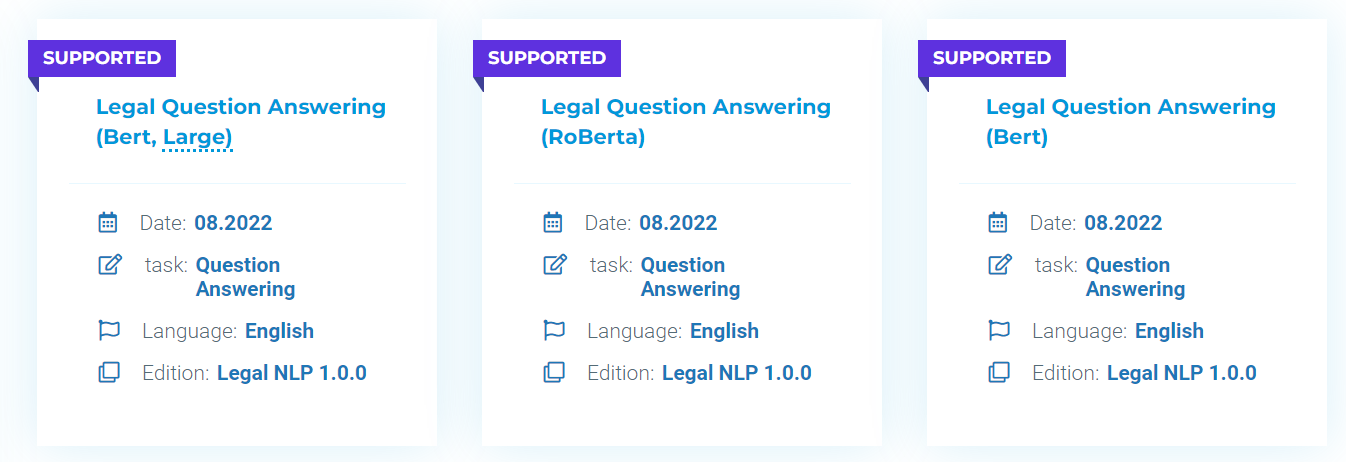

📜To do that, we use in our pipelines:
- a `MultiDocumentAssembler`, which puts together questions (Q to create H) and context (P).
- a BertForQuestionAnswering pretrained model. 

🚀**IMPORTANT: We highly recommend to use `setCaseSensitive(False)` to prevent uppercase to be managed as proper nouns and possibly trigger OOV.**

In [ ]:
documentAssembler = nlp.MultiDocumentAssembler()\
  .setInputCols(["question", "context"])\
  .setOutputCols(["document_question", "document_context"])

spanClassifier = nlp.BertForQuestionAnswering.pretrained("legqa_bert_large","en", "legal/models") \
  .setInputCols(["document_question", "document_context"]) \
  .setOutputCol("answer") \
  .setCaseSensitive(False) # IMPORTANT 

qa_pipeline = nlp.Pipeline().setStages([
  documentAssembler,
  spanClassifier
])

legqa_bert_large download started this may take some time.
Approximate size to download 1.2 GB
[OK!]


In [ ]:
P = normalized_intro

Q = [
     "What is the agreement type?", 
     "Who is signing the agreement?",
     "Is there any bank mentioned?",
     "Who is the Borrower?",
     "Who are the Lenders?",
     "Is this document a copy?",
     "What is the number of Exhibit?",
     "What is the amount of the credit?"
     ]

Q_P = [ [q, P] for q in Q]

example = spark.createDataFrame(Q_P).toDF("question", "context")

example.show()

+--------------------+--------------------+
|            question|             context|
+--------------------+--------------------+
|What is the agree...|Exhibit 10.1 EXEC...|
|Who is signing th...|Exhibit 10.1 EXEC...|
|Is there any bank...|Exhibit 10.1 EXEC...|
|Who is the Borrower?|Exhibit 10.1 EXEC...|
|Who are the Lenders?|Exhibit 10.1 EXEC...|
|Is this document ...|Exhibit 10.1 EXEC...|
|What is the numbe...|Exhibit 10.1 EXEC...|
|What is the amoun...|Exhibit 10.1 EXEC...|
+--------------------+--------------------+



In [ ]:
result = qa_pipeline.fit(example).transform(example)

result.select('question', 'answer.result', 'answer').show(truncate=False)

+---------------------------------+--------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|question                         |result                                                                                                                    |answer                                                                                                                                                                                                                                                                    |
+---------------------------------+-----------------------------------------------------------------------------------------------------------------

#🔎 AUTOMATIC QUESTION GENERATION
Now the question is ... is there a way to generate the questions automatically?

The answer is simple: **YES**, there is!

We have several ways to generate a series of questions, given for examplee:
- A `SUBJECT` of a sentence;
- An `ACTION` (verb);

More specifically, there are three ways:
1. Using the grammatical information (Part of Speech and Dependency Tree);
2. Using NER / Contextual Parser or other method to retrieve SUBJECT and VERB, for example, `legner_obligations`..

Check next notebook to see how to do it. Until then, a small spoiler...

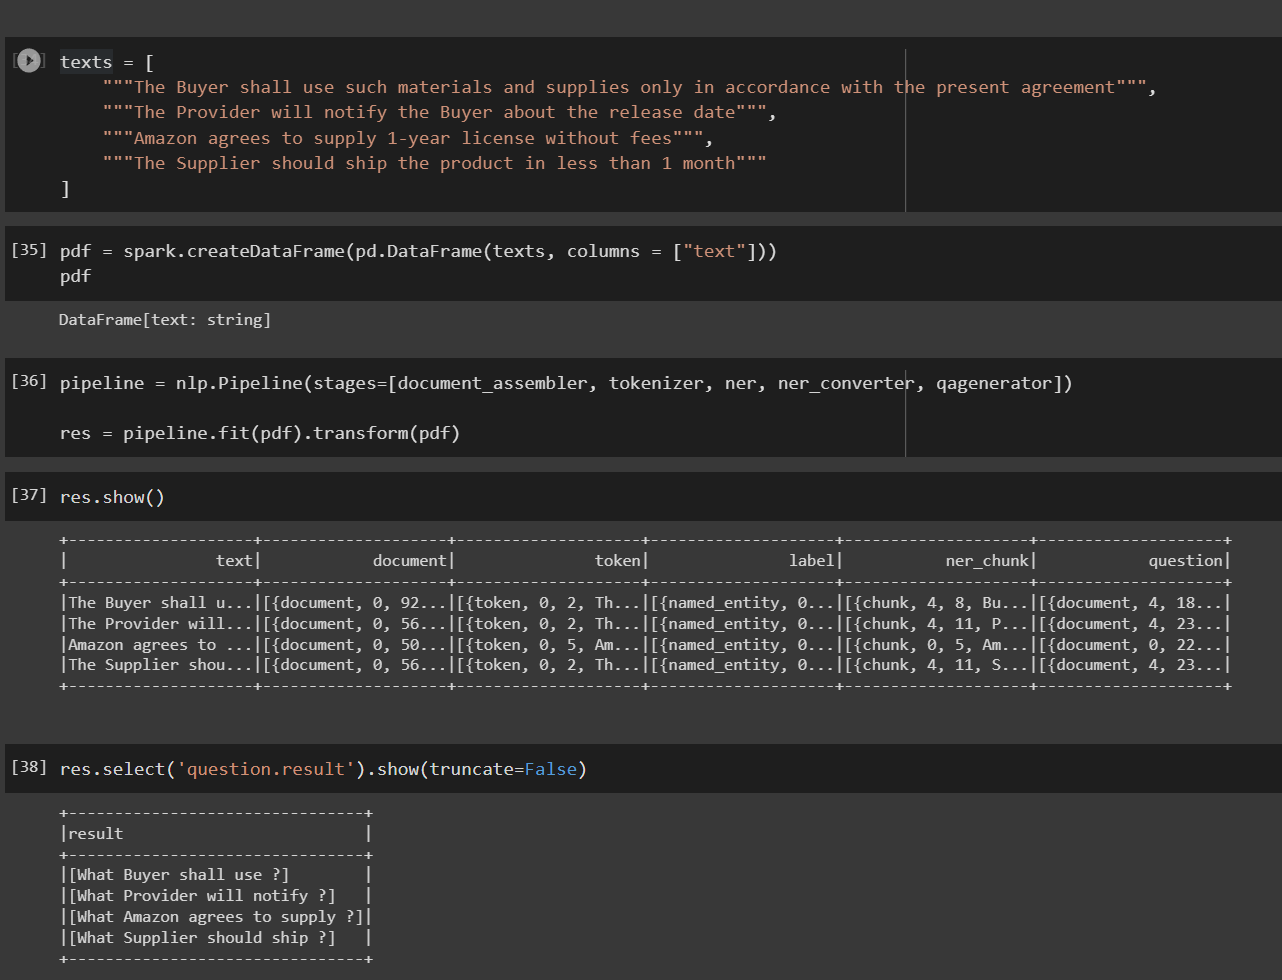

#📌 Table Question Answering
Although it may be not critical for Legal Documents, you may have information in `csv`, `xls` files, or even documents with `tables` on them you want to analyze.

We offer `Table Understanding` (or Table Question Answering) to satisfy those needs. Let's take a look at how it works.

#📌 1. From csv files

Let's create a `csv` file with information about clients and agreements.

In [ ]:
import pandas as pd

df_data = { 
    "header" : ['client name', 'last operation year', 'last operation amount', 'document'],
    "rows" : [    
 ['John Smith', '2007', '$200000', 'NDA'],
 ['Jack Gordon', '2017', '$10000',  'Credit Agreement'],
 ['Mary Lean', '2001', '$120000', 'License Agreement'],
 ['Jessica James', '2022', '$1200000', 'Purchase Agreement'],
]
}


df = pd.DataFrame(df_data['rows'], columns=df_data['header'])

df.to_csv('table.csv', index=False)


In [ ]:
df_data

{'header': ['client name',
  'last operation year',
  'last operation amount',
  'document'],
 'rows': [['John Smith', '2007', '$200000', 'NDA'],
  ['Jack Gordon', '2017', '$10000', 'Credit Agreement'],
  ['Mary Lean', '2001', '$120000', 'License Agreement'],
  ['Jessica James', '2022', '$1200000', 'Purchase Agreement']]}

In [ ]:
df

client name last operation year last operation amount            document
0     John Smith                2007               $200000                 NDA
1    Jack Gordon                2017                $10000    Credit Agreement
2      Mary Lean                2001               $120000   License Agreement
3  Jessica James                2022              $1200000  Purchase Agreement

In [ ]:
import json
json.dumps(df_data)

'{"header": ["client name", "last operation year", "last operation amount", "document"], "rows": [["John Smith", "2007", "$200000", "NDA"], ["Jack Gordon", "2017", "$10000", "Credit Agreement"], ["Mary Lean", "2001", "$120000", "License Agreement"], ["Jessica James", "2022", "$1200000", "Purchase Agreement"]]}'

Now, some questions...

In [ ]:
queries = [
    "Who signed an NDA?",
    "Who operated last time in 2022?", 
    "What is the total amount of operations?",
    "Which year a Credit Agreement was signed?",
]

Now, we will use the following specific components:
- A `MultiDocumentAssembler`, to put together the questions and the table in `json` format
- A `TableAssembler` to assemble the table from a json

In [ ]:
data = spark.createDataFrame([
        [json.dumps(df_data), " ".join(queries)]
    ]).toDF("table_json", "questions")

In [ ]:
data.show()

+--------------------+--------------------+
|          table_json|           questions|
+--------------------+--------------------+
|{"header": ["clie...|Who signed an NDA...|
+--------------------+--------------------+



In [ ]:
document_assembler = nlp.MultiDocumentAssembler() \
    .setInputCols("table_json", "questions") \
    .setOutputCols("document_table", "document_questions")

text_splitter = legal.TextSplitter() \
    .setInputCols(["document_questions"]) \
    .setOutputCol("questions")

table_assembler = nlp.TableAssembler()\
    .setInputCols(["document_table"])\
    .setOutputCol("table")

Last component is `TapasForQuestionAnswering`, which will carry out the inference process

In [ ]:
tapas = nlp.TapasForQuestionAnswering.pretrained("table_qa_tapas_base_finetuned_wtq", "en")\
    .setInputCols(["questions", "table"])\
    .setOutputCol("answers")

table_qa_tapas_base_finetuned_wtq download started this may take some time.
Approximate size to download 394.7 MB
[OK!]


Now the pipeline looks as follows:

In [ ]:
pipeline = nlp.Pipeline(stages=[
    document_assembler,
    text_splitter,
    table_assembler,
    tapas
])

And this is the result on fit/transform:

In [ ]:
model = pipeline.fit(data)
res = model\
    .transform(data)\
    .selectExpr("explode(answers) AS answer")\
    .select("answer")
res.show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|answer                                                                                                                                                                                                                         |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|{chunk, 0, 10, John Smith, {question -> Who signed an NDA?, aggregation -> NONE, cell_positions -> [0, 0], cell_scores -> 1.0}, []}                                                                                            |
|{chunk, 0, 13, Jessica James, {question -> Who operated last time in 2022?, aggregation -> NONE

In [ ]:
from pyspark.sql import functions as F
res.select("answer.metadata.question", F.expr('answer.result as answer'), F.expr('answer.metadata["aggregation"] as metadata')).show(truncate=False)

+-----------------------------------------+-----------------------------------------+--------+
|question                                 |answer                                   |metadata|
+-----------------------------------------+-----------------------------------------+--------+
|Who signed an NDA?                       |John Smith                               |NONE    |
|Who operated last time in 2022?          |Jessica James                            |NONE    |
|What is the total amount of operations?  |COUNT($200000, $10000, $120000, $1200000)|COUNT   |
|Which year a Credit Agreement was signed?|2017                                     |NONE    |
+-----------------------------------------+-----------------------------------------+--------+



#📌 2. From tables in scanned documents
You will need `Visual NLP`, another licensed product of JSL, to extract tables from documents.

The result will be just a csv, so you can apply the same code exposed above after you extract the table from your documents.

Check the [Visual NLP](`https://github.com/JohnSnowLabs/spark-ocr-workshop/tree/master/jupyter`) repo more details. In the meantime, a small spoiler...

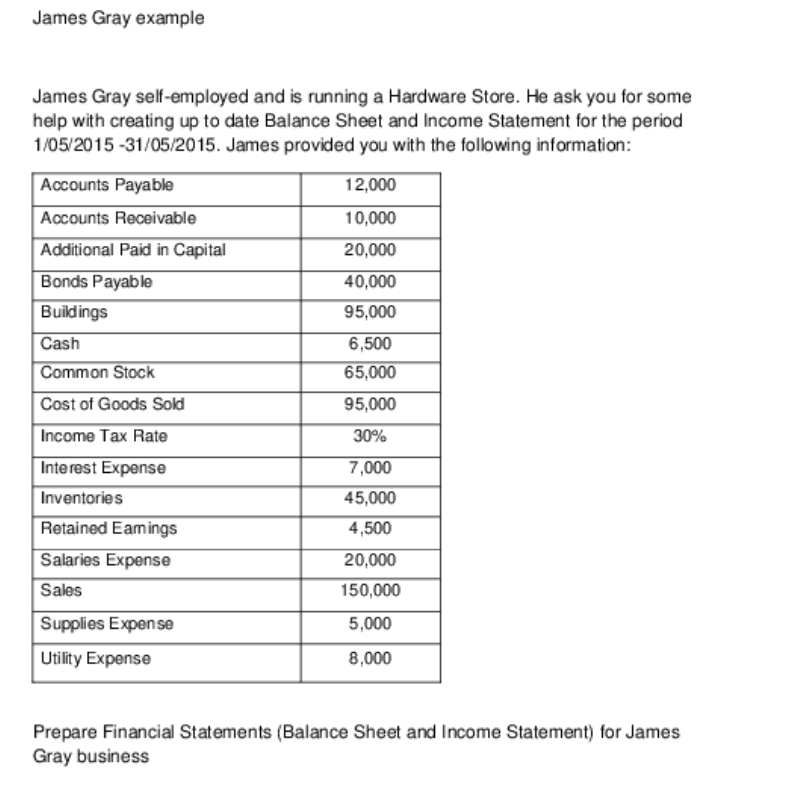

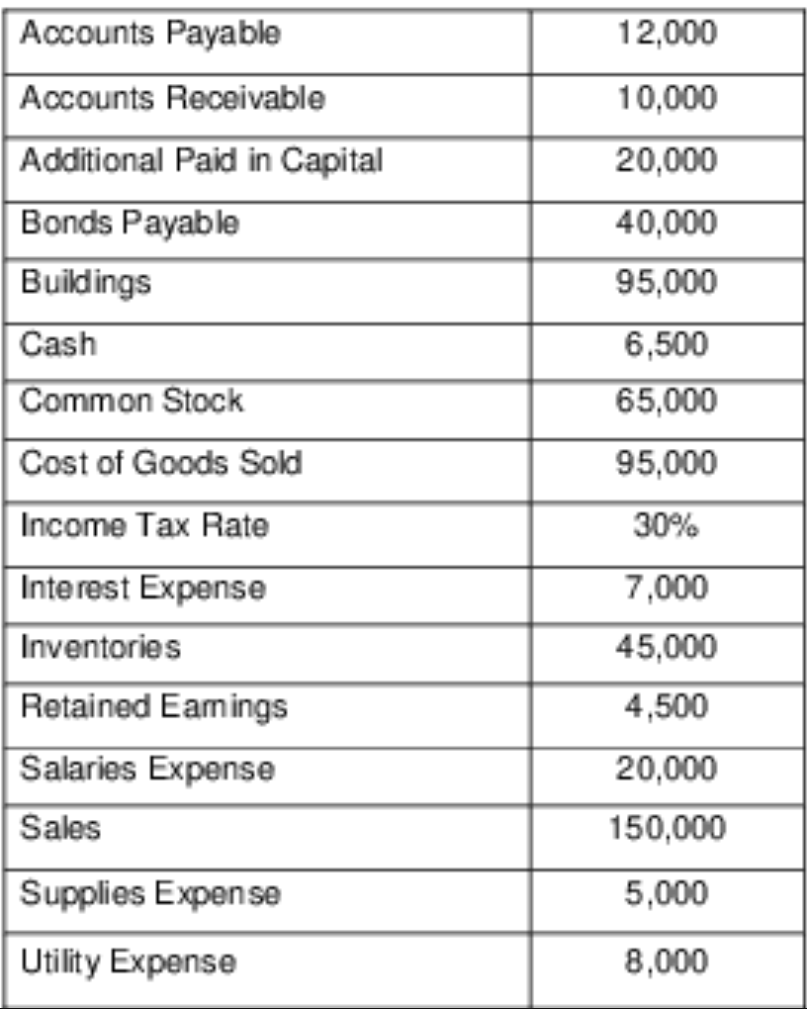

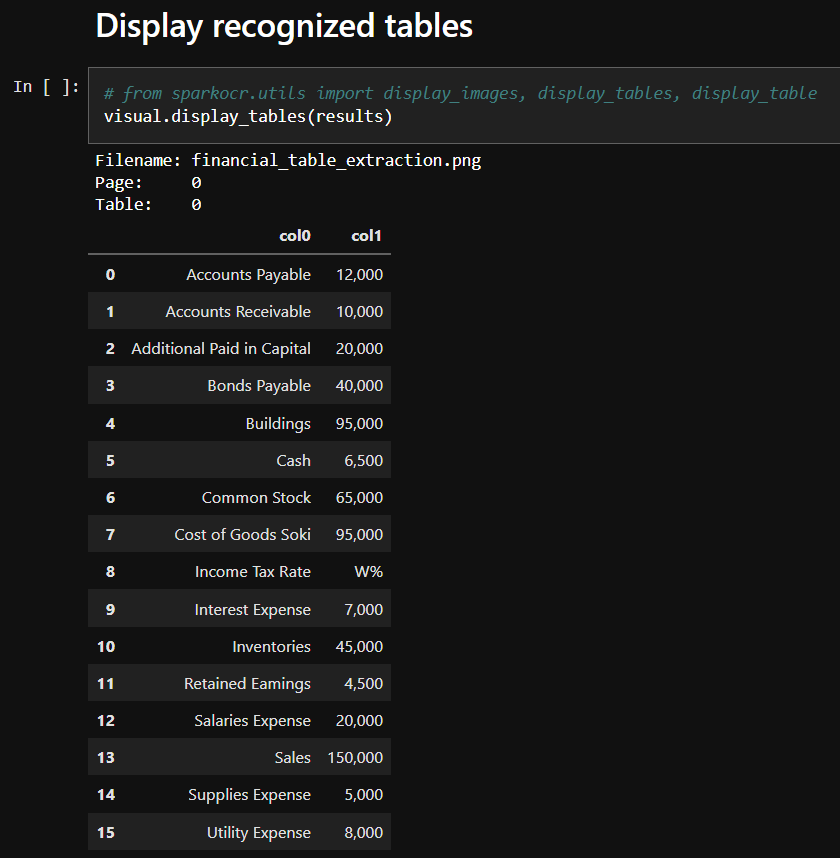

#🔎 Flan-T5 Question Answering

FLAN-T5 model is a state-of-the-art language model developed by Google AI that utilizes the T5 architecture for text generation tasks. The model is an encoder-decoder model that has been pre-trained on a multi-task mixture of unsupervised and supervised tasks and for which each task is converted into a text-to-text format.

During the training phase, FLAN-T5 was fed a large corpus of text data and was trained to predict missing words in an input text via a fill-in-the-blank style objective. This process is repeated multiple times until the model has learned to generate text that is similar to the input data.

Once trained, FLAN-T5 can be used to perform a variety of NLP tasks, such as text generation, language translation, sentiment analysis, and text classification.

![image](https://s3.amazonaws.com/moonup/production/uploads/1666363435475-62441d1d9fdefb55a0b7d12c.png)

**What are a few Use-cases?**

FLAN-T5 has a few potential use-cases:

1. **Text Generation:** FLAN-T5 can be used to generate text based on a prompt or input. This is ideal for content creation and creative writing including writing fiction, poetry, news articles, or product descriptions. The model can be fine-tuned for specific writing styles or genres to improve the quality of the output.
2. **Text Classification:** FLAN-T5 can be used to classify text into different categories, such as spam or non-spam, positive or negative, or topics such as politics, sports, or entertainment. This can be useful for a variety of applications, such as content moderation, customer support, or personalized recommendations.
3. **Text Summarization:** FLAN-T5 can be fine-tuned to generate concise summaries of long articles and documents, making it ideal for news aggregation and information retrieval.
4. **Sentiment Analysis:** FLAN-T5 can be used to analyze the sentiment of text, such as online reviews, news articles, or social media posts. This can help businesses to understand how their products or services are being received, and to make informed decisions based on this data.
5. **Question-Answering:** FLAN-T5 can be fine-tuned to answer questions in a conversational manner, making it ideal for customer service and support.
6. **Translation:** FLAN-T5 can be fine-tuned to perform machine translation, making it ideal for multilingual content creation and localization.
7. **Chatbots and Conversational AI:** FLAN-T5 can be used to create conversational AI systems that can respond to user input in a natural and engaging manner. The model can be trained to handle a wide range of topics and respond in a conversational tone that is appropriate for the target audience.

## **legqa_flant5_finetuned**

This `legqa_flant5_finetuned` Question Answering model has been fine-tuned on FLANT5 using finance data. This model provides powerful and efficient solution for accurately answering legal questions and delivering insightful information in the legal domain.

In [84]:
document_assembler = nlp.MultiDocumentAssembler()\
    .setInputCols("question", "context")\
    .setOutputCols("document_question", "document_context")

leg_qa = legal.QuestionAnswering.pretrained("legqa_flant5_finetuned","en","legal/models")\
    .setInputCols(["document_question", "document_context"])\
    .setCustomPrompt("question: {QUESTION} context: {CONTEXT}")\
    .setMaxNewTokens(40)\
    .setTopK(3)\
    .setOutputCol("answer")

pipeline = nlp.Pipeline(stages=[document_assembler, leg_qa])

empty_data = spark.createDataFrame([["",""]]).toDF("question", "context")

model = pipeline.fit(empty_data)


legqa_flant5_finetuned download started this may take some time.
[OK!]


In [85]:
context = """EXHIBIT 99.2 Page 1 of 3 DISTRIBUTOR AGREEMENT Agreement made this 19th day of March, 2020 Between: Co-Diagnostics, Inc. (herein referred to as "Principal") And PreCheck Health Services, Inc. (herein referred to as "Distributor"). In consideration of the mutual terms, conditions and covenants hereinafter set forth, Principal and Distributor acknowledge and agree to the following descriptions and conditions: DESCRIPTION OF PRINCIPAL The Principal is a company located in Utah, United States and is in the business of research and development of reagents. The Principal markets and sells it products globally through direct sales and distributors. DESCRIPTION OF DISTRIBUTOR The Distributor is a company operating or planning to operate in the United States of America, Latin America, Europe and Russia. The Distributor represents that the Distributor or a subsidiary of the Distributor is or will be fully licensed and registered in the Territory and will provide professional distribution services for the products of the Principal. CONDITIONS: 1. The Principal appoints the Distributor as a non-exclusive distributor, to sell Principal's qPCR infectious disease kits, Logix Smart COVID-19 PCR diagnostic test and Co-Dx Box™ instrument (the "Products"). The Products are described on Exhibit A to this Agreement. 2. The Principal grants Distributor non- exclusive rights to sell these products within the countries of Romania (the "Territory"), which may be amended by mutual written agreement."""

questions = ["""Which company is referred to as 'Principal' in the Distributor Agreement?""",
             """What is the date of the distributor agreement between Co-Diagnostics, Inc. and PreCheck Health Services, Inc.?""",
             """What is the Territory in which the Distributor has non-exclusive rights to sell Principal's products according to the Agreement?"""]

Q_P = [ [q, context] for q in questions]

data = spark.createDataFrame(Q_P).toDF("question", "context")

data.show(truncate = 60)



+------------------------------------------------------------+------------------------------------------------------------+
|                                                    question|                                                     context|
+------------------------------------------------------------+------------------------------------------------------------+
|Which company is referred to as 'Principal' in the Distri...|EXHIBIT 99.2 Page 1 of 3 DISTRIBUTOR AGREEMENT Agreement ...|
|What is the date of the distributor agreement between Co-...|EXHIBIT 99.2 Page 1 of 3 DISTRIBUTOR AGREEMENT Agreement ...|
|What is the Territory in which the Distributor has non-ex...|EXHIBIT 99.2 Page 1 of 3 DISTRIBUTOR AGREEMENT Agreement ...|
+------------------------------------------------------------+------------------------------------------------------------+



In [86]:
result = model.transform(data)

result.select('question', 'answer.result').show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------+
|question                                                                                                                        |result                                                                                                                                  |
+--------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------+
|Which company is referred to as 'Principal' in the Distributor Agreement?                                                       |[Co-Diagnostics, Inc. is referred to as 'Principal' in the Distrib

## **Using LightPipeline**

In [87]:
context = """EXHIBIT 99.2 Page 1 of 3 DISTRIBUTOR AGREEMENT Agreement made this 19th day of March, 2020 Between: Co-Diagnostics, Inc. (herein referred to as "Principal") And PreCheck Health Services, Inc. (herein referred to as "Distributor"). In consideration of the mutual terms, conditions and covenants hereinafter set forth, Principal and Distributor acknowledge and agree to the following descriptions and conditions: DESCRIPTION OF PRINCIPAL The Principal is a company located in Utah, United States and is in the business of research and development of reagents. The Principal markets and sells it products globally through direct sales and distributors. DESCRIPTION OF DISTRIBUTOR The Distributor is a company operating or planning to operate in the United States of America, Latin America, Europe and Russia. The Distributor represents that the Distributor or a subsidiary of the Distributor is or will be fully licensed and registered in the Territory and will provide professional distribution services for the products of the Principal. CONDITIONS: 1. The Principal appoints the Distributor as a non-exclusive distributor, to sell Principal's qPCR infectious disease kits, Logix Smart COVID-19 PCR diagnostic test and Co-Dx Box™ instrument (the "Products"). The Products are described on Exhibit A to this Agreement. 2. The Principal grants Distributor non- exclusive rights to sell these products within the countries of Romania (the "Territory"), which may be amended by mutual written agreement."""

questions = ["""Which company is referred to as 'Principal' in the Distributor Agreement?""",
             """What is the date of the distributor agreement between Co-Diagnostics, Inc. and PreCheck Health Services, Inc.?""",
             """What is the Territory in which the Distributor has non-exclusive rights to sell Principal's products according to the Agreement?"""]

light_model = nlp.LightPipeline(model)

all_result = []

for q in range(len(questions)):
  light_result = light_model.annotate([questions[q]],[context])
  all_result.append(light_result)

all_result

[[{'document_question': ["Which company is referred to as 'Principal' in the Distributor Agreement?"],
   'document_context': ['EXHIBIT 99.2 Page 1 of 3 DISTRIBUTOR AGREEMENT Agreement made this 19th day of March, 2020 Between: Co-Diagnostics, Inc. (herein referred to as "Principal") And PreCheck Health Services, Inc. (herein referred to as "Distributor"). In consideration of the mutual terms, conditions and covenants hereinafter set forth, Principal and Distributor acknowledge and agree to the following descriptions and conditions: DESCRIPTION OF PRINCIPAL The Principal is a company located in Utah, United States and is in the business of research and development of reagents. The Principal markets and sells it products globally through direct sales and distributors. DESCRIPTION OF DISTRIBUTOR The Distributor is a company operating or planning to operate in the United States of America, Latin America, Europe and Russia. The Distributor represents that the Distributor or a subsidiary of

In [88]:
import textwrap

context = textwrap.fill(all_result[0][0]['document_context'][0], width=120)

print("➤ Context: \n{}".format(context))
print("\n")

for q in range(len(questions)):

  question = textwrap.fill(all_result[q][0]['document_question'][0], width=120)

  answer = textwrap.fill(all_result[q][0]['answer'][0], width=120)

  print("➤ Question: \n{}".format(question))
  print("\n")
  print("➤ Answer: \n{}".format(answer))
  print("\n")

➤ Context: 
EXHIBIT 99.2 Page 1 of 3 DISTRIBUTOR AGREEMENT Agreement made this 19th day of March, 2020 Between: Co-Diagnostics, Inc.
(herein referred to as "Principal") And PreCheck Health Services, Inc. (herein referred to as "Distributor"). In
consideration of the mutual terms, conditions and covenants hereinafter set forth, Principal and Distributor acknowledge
and agree to the following descriptions and conditions: DESCRIPTION OF PRINCIPAL The Principal is a company located in
Utah, United States and is in the business of research and development of reagents. The Principal markets and sells it
products globally through direct sales and distributors. DESCRIPTION OF DISTRIBUTOR The Distributor is a company
operating or planning to operate in the United States of America, Latin America, Europe and Russia. The Distributor
represents that the Distributor or a subsidiary of the Distributor is or will be fully licensed and registered in the
Territory and will provide professional distribu